In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
data = pd.read_csv('gdansk_larger_data.csv')

## Glimpse of the weather data

In [3]:
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,gdańsk,2014-08-01,23.7,13.2,19.1,23.7,13.2,19.1,13.3,71.3,...,20.9,8,NaN,2014-08-01T04:56:48,2014-08-01T20:45:30,0.18,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"12142099999,12376599999,12136099999,EPGD,12160..."
1,gdańsk,2014-08-02,26.4,15.3,21.4,26.4,15.3,21.4,16.7,75.5,...,21.2,7,NaN,2014-08-02T04:58:31,2014-08-02T20:43:38,0.22,"Rain, Partially cloudy",Clearing in the afternoon with late afternoon ...,rain,"12142099999,12376599999,12136099999,EPGD,12160..."
2,gdańsk,2014-08-03,33.0,19.3,26.3,31.4,19.3,25.7,13.2,48.9,...,25.1,8,NaN,2014-08-03T05:00:15,2014-08-03T20:41:44,0.25,Clear,Clear conditions throughout the day.,clear-day,"12142099999,12376599999,12136099999,EPGD,12160..."
3,gdańsk,2014-08-04,30.1,19.0,23.9,29.5,19.0,23.9,15.3,60.6,...,12.4,4,NaN,2014-08-04T05:02:00,2014-08-04T20:39:49,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"12142099999,12376599999,12136099999,EPGD,12160..."
4,gdańsk,2014-08-05,25.4,17.3,20.2,25.4,17.3,20.2,17.8,86.5,...,11.7,4,NaN,2014-08-05T05:03:45,2014-08-05T20:37:51,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"12142099999,12376599999,12136099999,EPGD,12160..."


## Cleaning the data

In [4]:
data['datetime'] = pd.to_datetime(data['datetime'])    
data['datetime'] = data['datetime'].dt.date
data = data.drop('name', axis=1)

## List of all columns from the dataset

In [5]:
list(data.columns)

['datetime',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'severerisk',
 'sunrise',
 'sunset',
 'moonphase',
 'conditions',
 'description',
 'icon',
 'stations']

## Visualizing the temperature

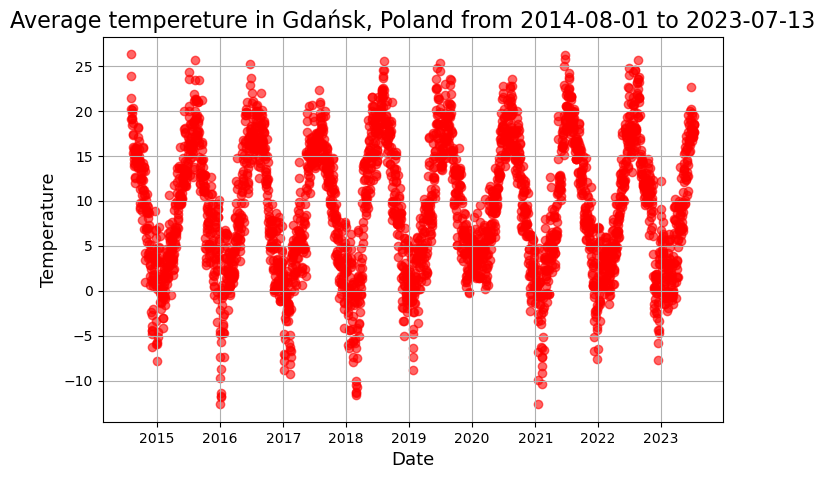

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(x=data['datetime'], y=data['temp'], color='red', alpha=0.6)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Temperature', fontsize=13)
plt.title(f"Average tempereture in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.grid()
plt.show()

In [7]:
min_feel = data['feelslikemin'].min()
max_feel = data['feelslikemax'].max()
indexofminfeelslike = np.where(data['feelslikemin'] == min_feel)
indexofmaxfeelslike = np.where(data['feelslikemax'] == max_feel)
min_feel_data = data['datetime'][indexofminfeelslike[0][0]]
max_feel_data = data['datetime'][indexofmaxfeelslike[0][0]]

## Visualizing the feels like temperature and the temperature on one plot

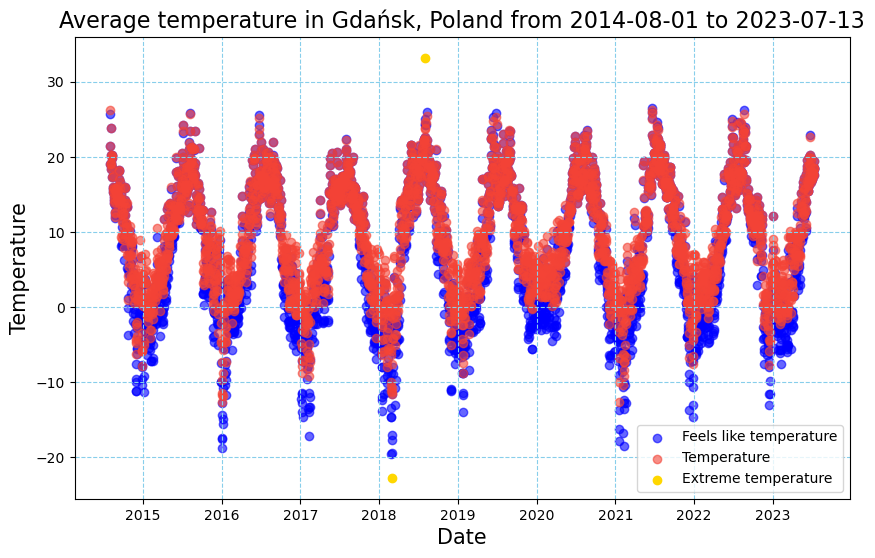

The lowest noted temperature -15.1 / The lowest feels like noted temperature -22.7
The highest noted temperature 33.0 / the highest feels like noted temperature 33.2


In [8]:
extreme_temp = [max_feel, min_feel]
extreme_temp_date = [max_feel_data, min_feel_data]

plt.figure(figsize=(10, 6))
plt.scatter(x=data['datetime'], y=data['feelslike'], color='blue', alpha=0.6, label='Feels like temperature')
plt.scatter(x=data['datetime'], y=data['temp'], color='#F44336', alpha=0.6, label='Temperature')
plt.scatter(x=extreme_temp_date, y=extreme_temp, color='gold', label='Extreme temperature')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title(f"Average temperature in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.grid(True, linestyle='--', color='skyblue')  # Add gridlines with a dashed line style
plt.legend()

plt.show()

print(f"The lowest noted temperature {data['tempmin'].min()} / The lowest feels like noted temperature {data['feelslikemin'].min()}")
print(f"The highest noted temperature {data['tempmax'].max()} / the highest feels like noted temperature {data['feelslikemax'].max()}")

## Function to help creating plots from chunk of weather data

In [9]:
def chunk_date_data(start_date: 'str', end_date: 'str') -> 'pandas.core.series.Series': 
    # Format YYYY-MM-DD
    if start_date > end_date:
        raise ValueError("start_date cannot be higher than end_date.")
    target_date_start = pd.to_datetime(start_date).date() # Changing type of str to pd.datetime
    target_date_end = pd.to_datetime(end_date).date()
    index_value_start = data.loc[data['datetime'] == target_date_start].index[0] # getting index of certain date from datetime column
    index_value_end = data.loc[data['datetime'] == target_date_end].index[0]
    new_data = data[index_value_start:(index_value_end + 1)]
    new_data = new_data = new_data.reset_index(drop=True) # Resetting indexes to start from 0
    return new_data
    

## Visualzing the chunk of data on a scatter plot 

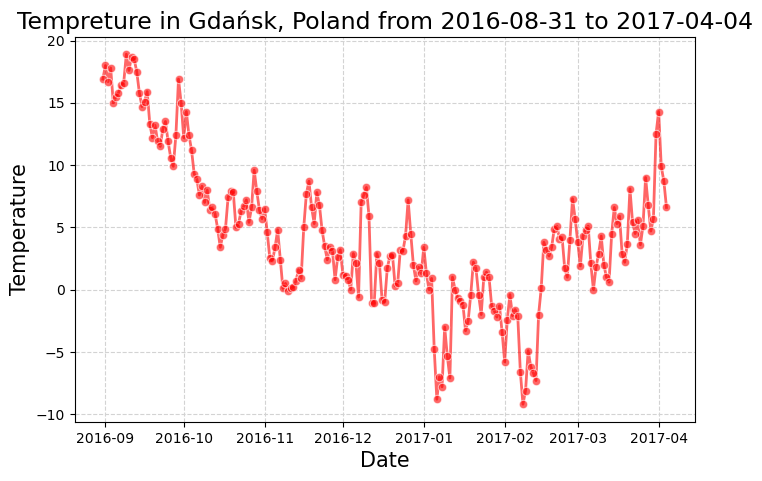

In [10]:
data_chunk = chunk_date_data(start_date='2016-08-31', end_date='2017-04-04')
plt.figure(figsize=(8, 5))
sns.lineplot(x=data_chunk['datetime'], y=data_chunk['temp'], color='red', alpha=0.6, linewidth=2, marker='o')
plt.grid(linestyle='--', color='lightgray')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title(f"Tempreture in Gdańsk, Poland from {data_chunk['datetime'].min()} to {data_chunk['datetime'].max()}", fontsize=17)
plt.show()

## Linear plot visualizing temperature over time

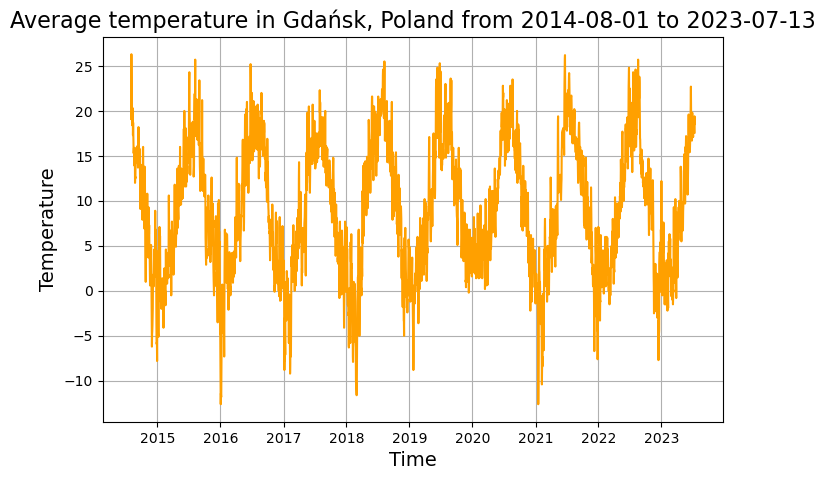

In [11]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=data['datetime'], y=data['temp'], color='#FFA000')
plt.title(f"Average temperature in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid()
plt.show()

## Visualizing rainy days on a scatter plot

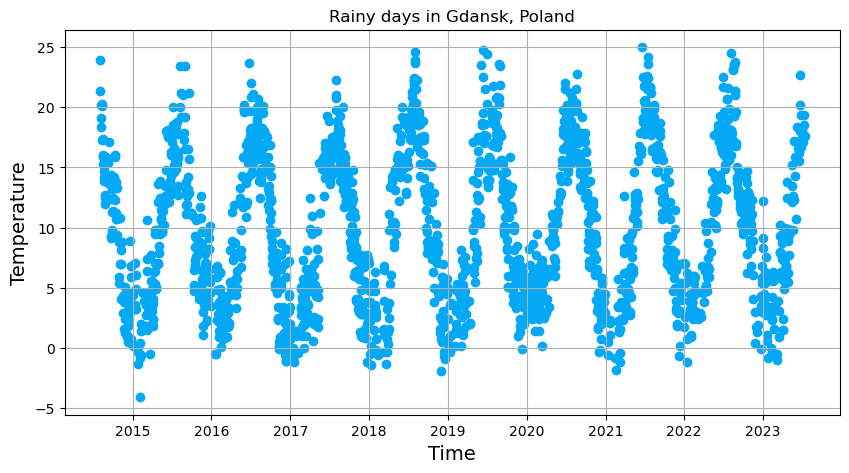

Percentage of rainy days in Gdansk in whole period: 60.21%


In [12]:
plt.figure(figsize=(10, 5))
rain_data = data[data['icon'] == 'rain']
plt.scatter(x=rain_data['datetime'], y=rain_data['temp'], color='#03A9F4')
plt.title('Rainy days in Gdansk, Poland')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid()
plt.show()

data_rain = len(rain_data)
percentage_rain = round((data_rain / len(data) * 100), 2)
print(f'Percentage of rainy days in Gdansk in whole period: {percentage_rain}%')

## Calculating rainy days in one certain year

In [13]:
data_2022 = chunk_date_data(start_date='2022-01-01', end_date='2022-12-31')
rain_2022 = data_2022[data_2022['icon'] == 'rain']
rainy_days_2022 = len(rain_2022)
percentage_rain_2022 = round((rainy_days_2022 / len(data_2022) * 100), 2)
print(f'Percentage of rainy days in 2022: {percentage_rain_2022}%')

Percentage of rainy days in 2022: 58.9%


## Scatter plot used for showing Uv index measurements over time

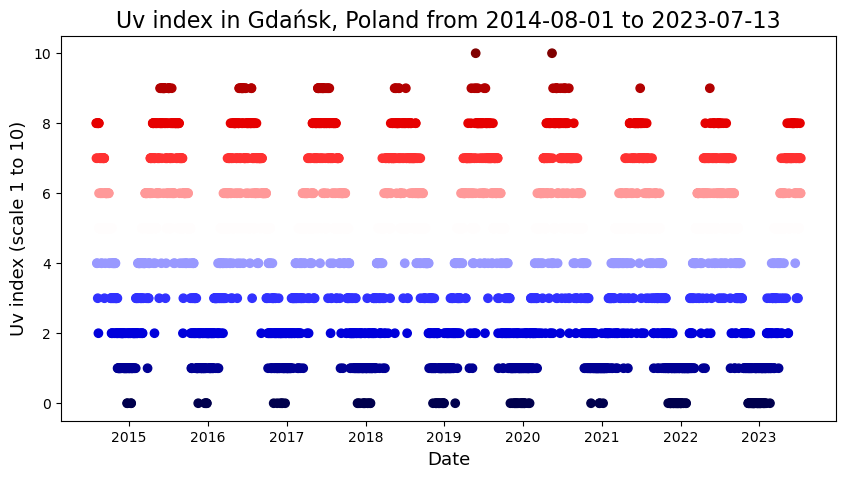

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(x=data['datetime'], y=data['uvindex'], c=data['uvindex'], cmap='seismic')
plt.title(f"Uv index in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Uv index (scale 1 to 10)', fontsize=13)
plt.show()

## Snowy days over time shown on scatter plot

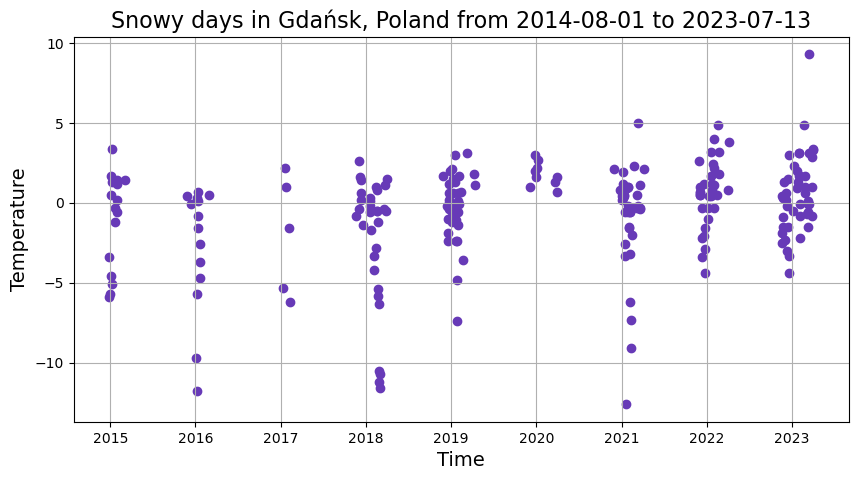

Percentage of snowy days in Gdansk: 7.13%


In [15]:
snow_data = data[data['snow'] > 0]
plt.figure(figsize=(10, 5))
plt.scatter(x=snow_data['datetime'], y=snow_data['temp'], color='#673AB7')
plt.title(f"Snowy days in Gdańsk, Poland from {data['datetime'].min()} to {data['datetime'].max()}", fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid()
plt.show()
snowy_days = len(snow_data)
snow_percentage = round((snowy_days / len(data) * 100), 2)
print(f'Percentage of snowy days in Gdansk: {snow_percentage}%')

## Visualizing histogram of humidity levels

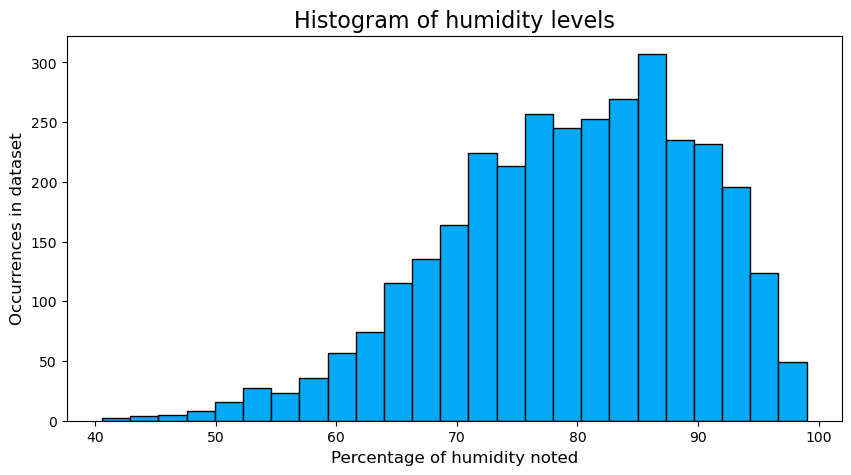

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(data['humidity'], color='#03A9F4', bins=25, ec='black')
plt.xlabel('Percentage of humidity noted', fontsize=12)
plt.ylabel('Occurrences in dataset', fontsize=12)
plt.title('Histogram of humidity levels', fontsize=16)
plt.show()

## Correlation between temperature and uv index

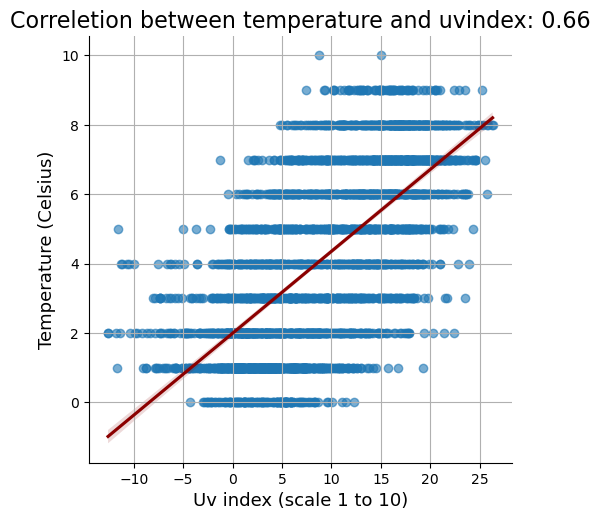

In [17]:
sns.lmplot(x='temp', y='uvindex', data=data,
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.title(f"Correletion between temperature and uvindex: {round(data['temp'].corr(data['uvindex']), 2)}",
          fontsize=16)
plt.xlabel('Uv index (scale 1 to 10)', fontsize=13)
plt.ylabel('Temperature (Celsius)', fontsize=13)
plt.grid()
plt.show()